In [5]:
%pip install pandas matplotlib seaborn scipy nltk textblob WordCloud scikit-learn
%pip freeze > ../requirements.txt

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/21/1d/3df58df8bd425f425df9f90b316618ace62b7f1f838ac1580191025cc735/scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 217.9 kB/s eta 0:00:51
   ---------------------------------------- 0.0/11.1 MB 217.9 kB/s eta 0:00:51
   ---------------------------------------- 0.1/11.1 MB 272.3 kB/s eta 0:00:41
   ---------------------------------------- 0.1/11.1 MB 305.0 kB/s eta 0:00:37
   -----------------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import re

import pandas as pd
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darkles\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
dataset_path = os.path.join(r"../datasets/cleaned", "analyst_ratings_cleaned.csv")
df = pd.read_csv(dataset_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [9]:
df 

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [10]:
df.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [11]:
df.sort_values(by='date', ascending=False)

,headline,url,publisher,date,stock
1343658,Quicken Loans Plans To IPO: Report,https://www.benzinga.com/news/20/06/16238300/q...,Jason Shubnell,2020-06-11 17:12:35-04:00,WFC
980443,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG
1269090,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR
1357564,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,JJ Kinahan,2020-06-11 16:51:33-04:00,WMT
1039004,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH
...,...,...,...,...,...
67712,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22 00:00:00,AM
1432,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29 00:00:00,A
519806,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00,FT
1390006,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00,Y


In [12]:
df.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [13]:
# Filter for a specific date range
event_data = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2021-12-31')]

# Analyze publication counts during the event
event_trends = event_data['date'].dt.date.value_counts().sort_index()
event_trends

AttributeError: Can only use .dt accessor with datetimelike values

Text(0, 0.5, 'Number of Publications')

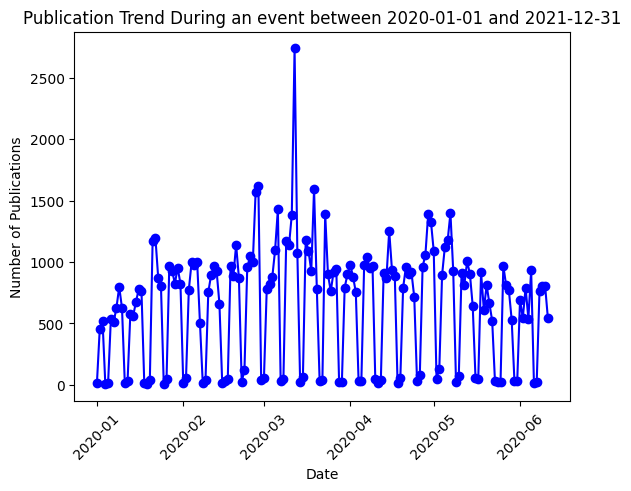

In [74]:
# Plot the event trend
event_trends.plot(kind='line', marker='o', color='blue')
plt.title('Publication Trend During an event between 2020-01-01 and 2021-12-31')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Publications')

In [79]:
df['headline'].apply(len).min(), df['headline'].apply(len).max(), df['headline_length'].median()

(np.int64(3), np.int64(512), np.float64(64.0))

In [80]:
# Headline Length Statistics
df['headline_length'] = df['headline'].apply(len)
headline_length_stats = df[['headline_length']].describe()

headline_length_stats

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


In [81]:
# Perform sentiment analysis on headlines
def get_sentiment_analysis(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral' 

# Identify common keywords or phrases
def extract_keywords(headline):
    # Remove punctuation and split into words
    words = re.findall(r'\w+', headline.lower())
    return words

In [82]:

df['sentiment'] = df['headline'].apply(get_sentiment_analysis)

# Display sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

In [ ]:
# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['Yellow', 'green', 'red'])
plt.title("Sentiment Distribution of Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()

In [ ]:
# Generate a word cloud from the headlines
all_keywords = df['headline'].apply(extract_keywords).sum()

In [ ]:
# common_keywords = Counter(all_keywords).most_common(20)

# # Common Keywords or Phrases
# for keyword, count in common_keywords:
#     print(f"{keyword}: {count}")

In [ ]:
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_keywords))

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Headlines')
# plt.show()

In [ ]:
# Ensure the column with headlines is correctly identified
headline = "headline"  # Replace with the actual column name
df[headline ]= df[headline].astype(str)  # Ensure data is string

# Step 1: Preprocess the text (convert to lower case, remove stopwords)
stop_words = set(stopwords.words("english"))

# Preprocessing function
def preprocess_text(text):
    # Tokenize, convert to lowercase, and remove stopwords
    words = text.lower().split()  # You can use more advanced tokenization if needed
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Apply preprocessing
df['clean_headlines'] = df[headline].apply(preprocess_text)

# Step 2: Extract keywords using TF-IDF
vectorizer = TfidfVectorizer(max_features=20, ngram_range=(1, 2))  # Unigrams and bigrams
X = vectorizer.fit_transform(df['clean_headlines'])

# Get feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Display the top keywords (sorted by TF-IDF score)
keyword_scores = X.sum(axis=0).A1  # Sum the scores of each feature (keyword)
top_keywords = sorted(zip(keywords, keyword_scores), key=lambda x: x[1], reverse=True)

print("Top Keywords:")
for keyword, score in top_keywords:
    print(f"{keyword}: {score}")

# Step 3: Extract Common Phrases (N-grams)
# N-grams help identify common multi-word phrases like "FDA approval", "price target", etc.
n = 2  # Bigram (2-word) phrases
bigrams = ngrams(" ".join(df['clean_headlines']).split(), n)
bigram_freq = Counter(bigrams)

print("\nTop Bigrams (Phrases):")
for phrase, freq in bigram_freq.most_common(10):
    print(f"{' '.join(phrase)}: {freq}")